In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
df = pd.read_csv('train.csv')


In [68]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
df.drop(['Ticket', 'PassengerId'], axis=1, inplace=True)

In [71]:
sex_mapper = {'male':0,'female':1 }
df['Sex'].replace(sex_mapper, inplace=True)

In [72]:
df['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [73]:
def replace_title(x):
    return x.split(',')[1].strip().split(' ')[0]

In [74]:
df['Title'] = df['Name'].apply(replace_title)

In [75]:
df['Title'] = [0 if x in ['Mr.', 'Miss.', 'Mrs.'] else 1 for x in df['Title']]

In [76]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S,0


In [77]:
df = df.rename(columns={'Title': 'Title_Unusual'})
df.drop('Name', axis=1, inplace=True)

In [78]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title_Unusual
0,0,3,0,22.0,1,0,7.2500,NaN,S,0
1,1,1,1,38.0,1,0,71.2833,C85,C,0
2,1,3,1,26.0,0,0,7.9250,NaN,S,0
3,1,1,1,35.0,1,0,53.1000,C123,S,0
4,0,3,0,35.0,0,0,8.0500,NaN,S,0


In [79]:
df['Cabin_Known'] = [0 if str(x) == 'nan' else 1 for x in df['Cabin']]
df.drop('Cabin', axis=1, inplace=True)

In [80]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Unusual,Cabin_Known
0,0,3,0,22.0,1,0,7.2500,S,0,0
1,1,1,1,38.0,1,0,71.2833,C,0,1
2,1,3,1,26.0,0,0,7.9250,S,0,0
3,1,1,1,35.0,1,0,53.1000,S,0,1
4,0,3,0,35.0,0,0,8.0500,S,0,0


In [81]:
emb_dummies = pd.get_dummies(df['Embarked'], drop_first=True, prefix='Embarked')
df = pd.concat([df, emb_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)

In [82]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1


In [83]:
df.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Title_Unusual      0
Cabin_Known        0
Embarked_Q         0
Embarked_S         0
dtype: int64

In [85]:
mean_imputation_df = df.copy()
mean_imputation_df['Age_mean_filled'] = mean_imputation_df['Age'].fillna(df['Age'].mean())

In [86]:
mean_imputation_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [87]:
mean_imputation_df['Age_mean_filled'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age_mean_filled, dtype: float64

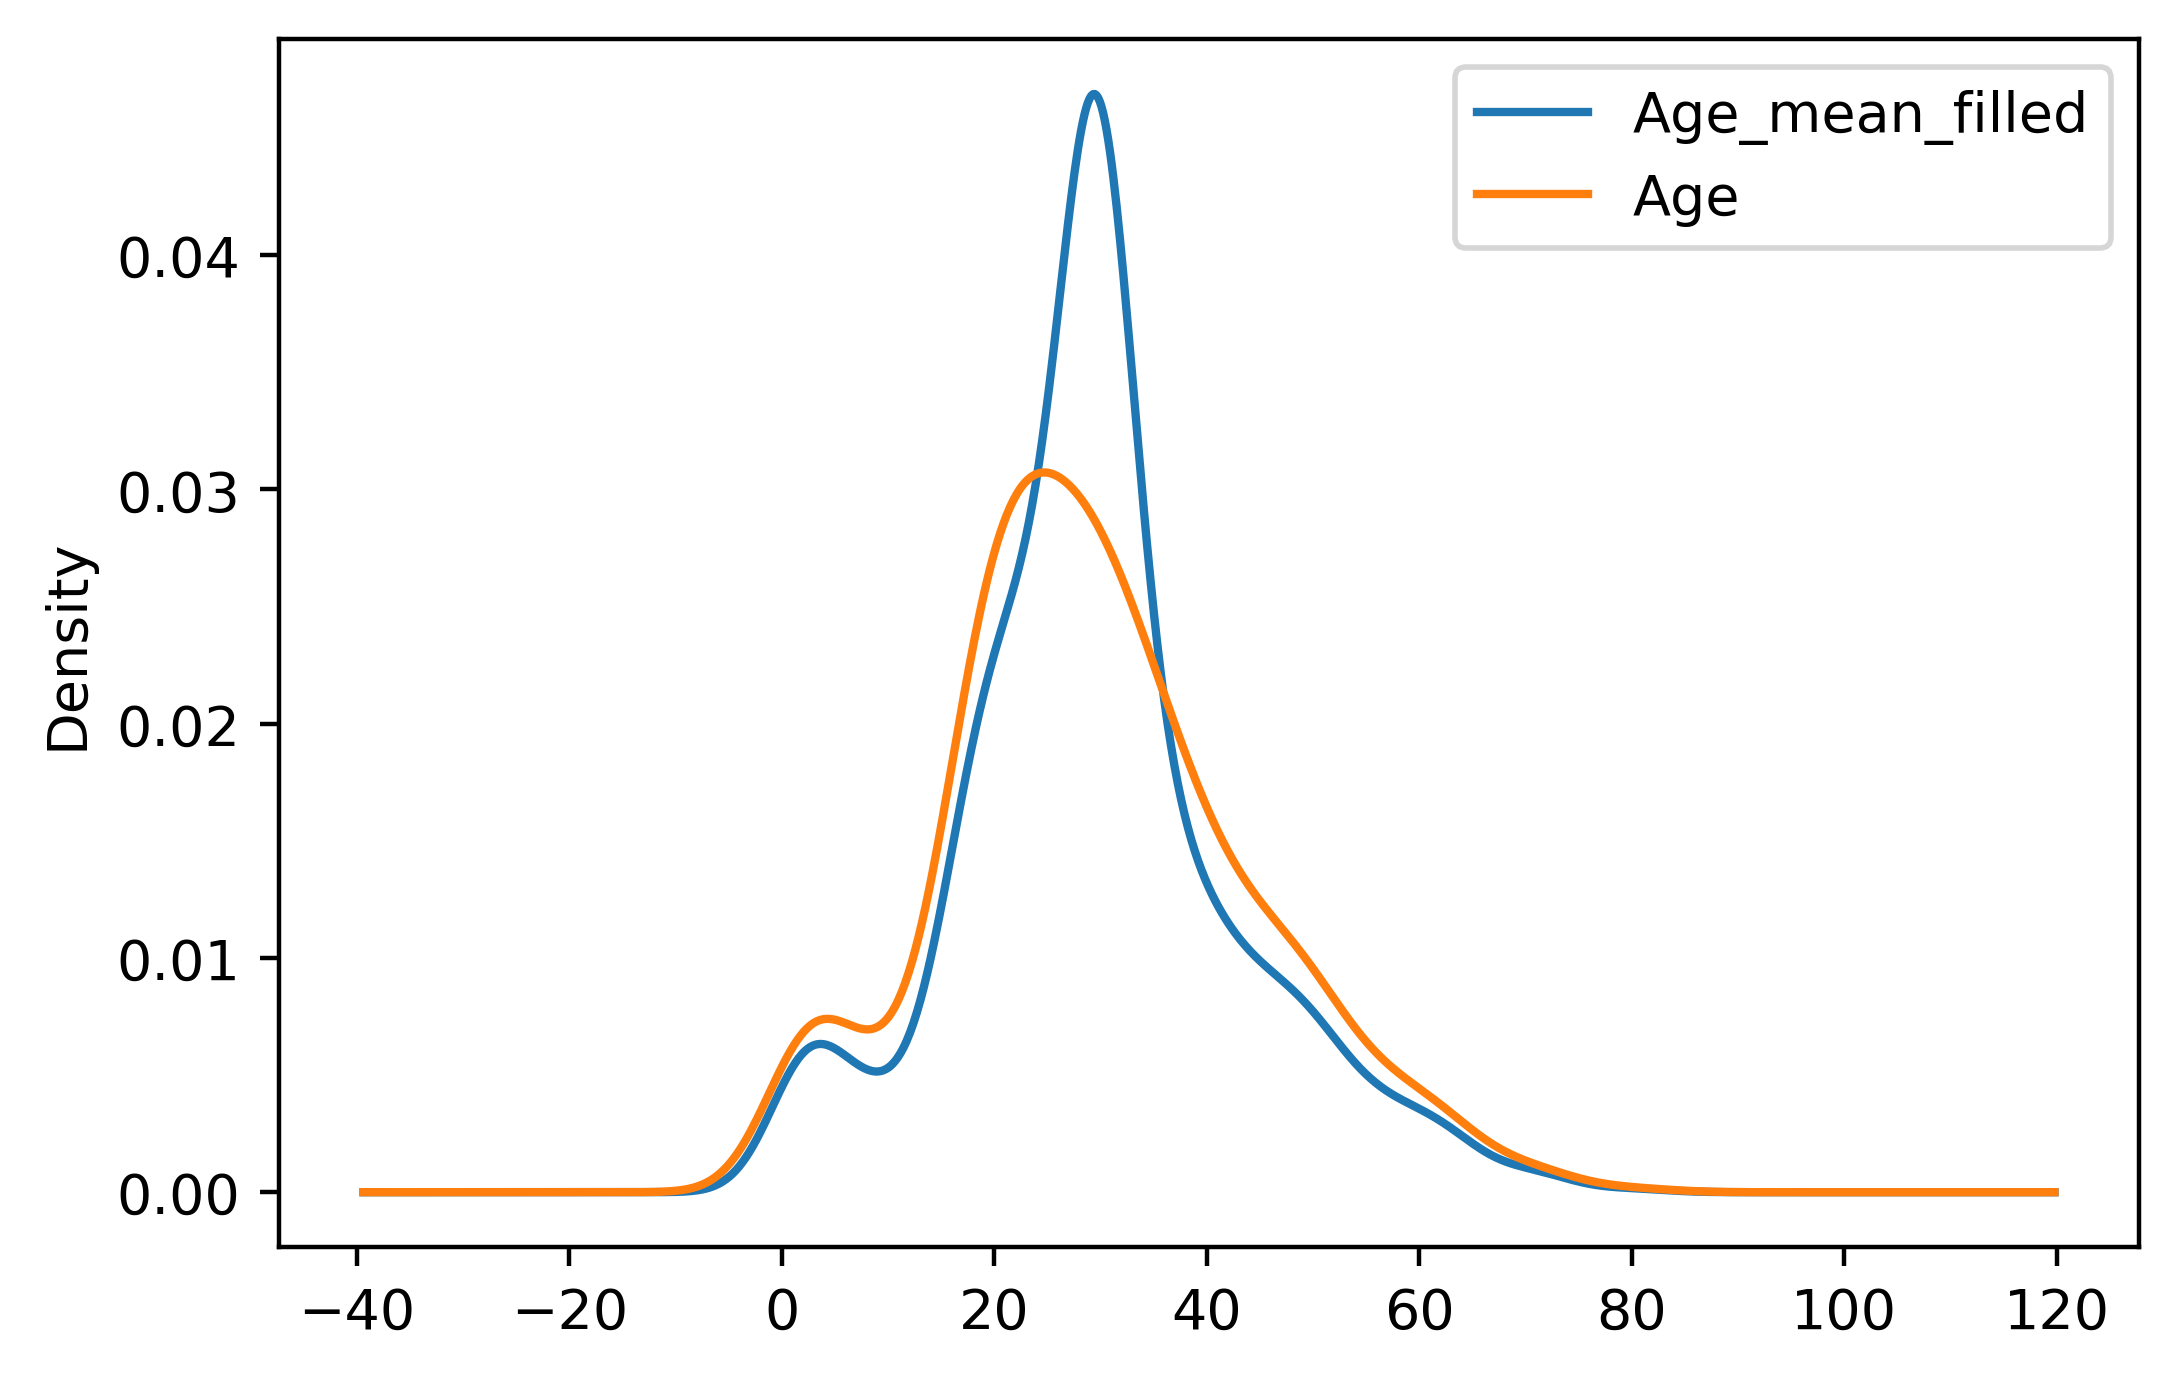

In [101]:
# mean_imputation_df[['Age_mean_filled',"Age"]].hist()
mean_imputation_df[['Age_mean_filled',"Age"]].plot.kde()

In [102]:
# bins= np.arange(start=0, stop=80, step=8)
# mean_imputation = mean_imputation_df[["Age", 'Age_mean_filled']]
# mean_imputation.plot(kind='hist', bins=bins, figsize=[12,6], alpha=.3, legend=True);

In [108]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,1,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1


In [104]:
from impyute.imputation.cs import mice
X = df.drop('Survived', axis=1)
imputed = mice(X.values)
mice_ages = imputed[:, 2]

In [113]:
imputed_df = pd.DataFrame({'Pclass': imputed[:, 0], 'Sex': imputed[:, 1], 
                                    'Imputed_Age': imputed[:, 2], 'SibSp': imputed[:, 3],
                                    'Parch': imputed[:, 4], 'Fare': imputed[:, 5],
                                    'Title_Unusual': imputed[:, 6], 'Cabin_Known': imputed[:, 7],
                                    'Embarked_Q': imputed[:, 8], 'Embarked_S': imputed[:, 9]})

In [114]:
imputed_df.head()

,Pclass,Sex,Imputed_Age,SibSp,Parch,Fare,Title_Unusual,Cabin_Known,Embarked_Q,Embarked_S
0,3.0,0.0,22.0,1.0,0.0,7.2500,0.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,1.0,0.0,1.0
4,3.0,0.0,35.0,0.0,0.0,8.0500,0.0,0.0,0.0,1.0


In [115]:
imputed_df['Age'] = mean_imputation_df['Age']
imputed_df['Age_mean_filled'] = mean_imputation_df['Age'].fillna(df['Age'].mean())

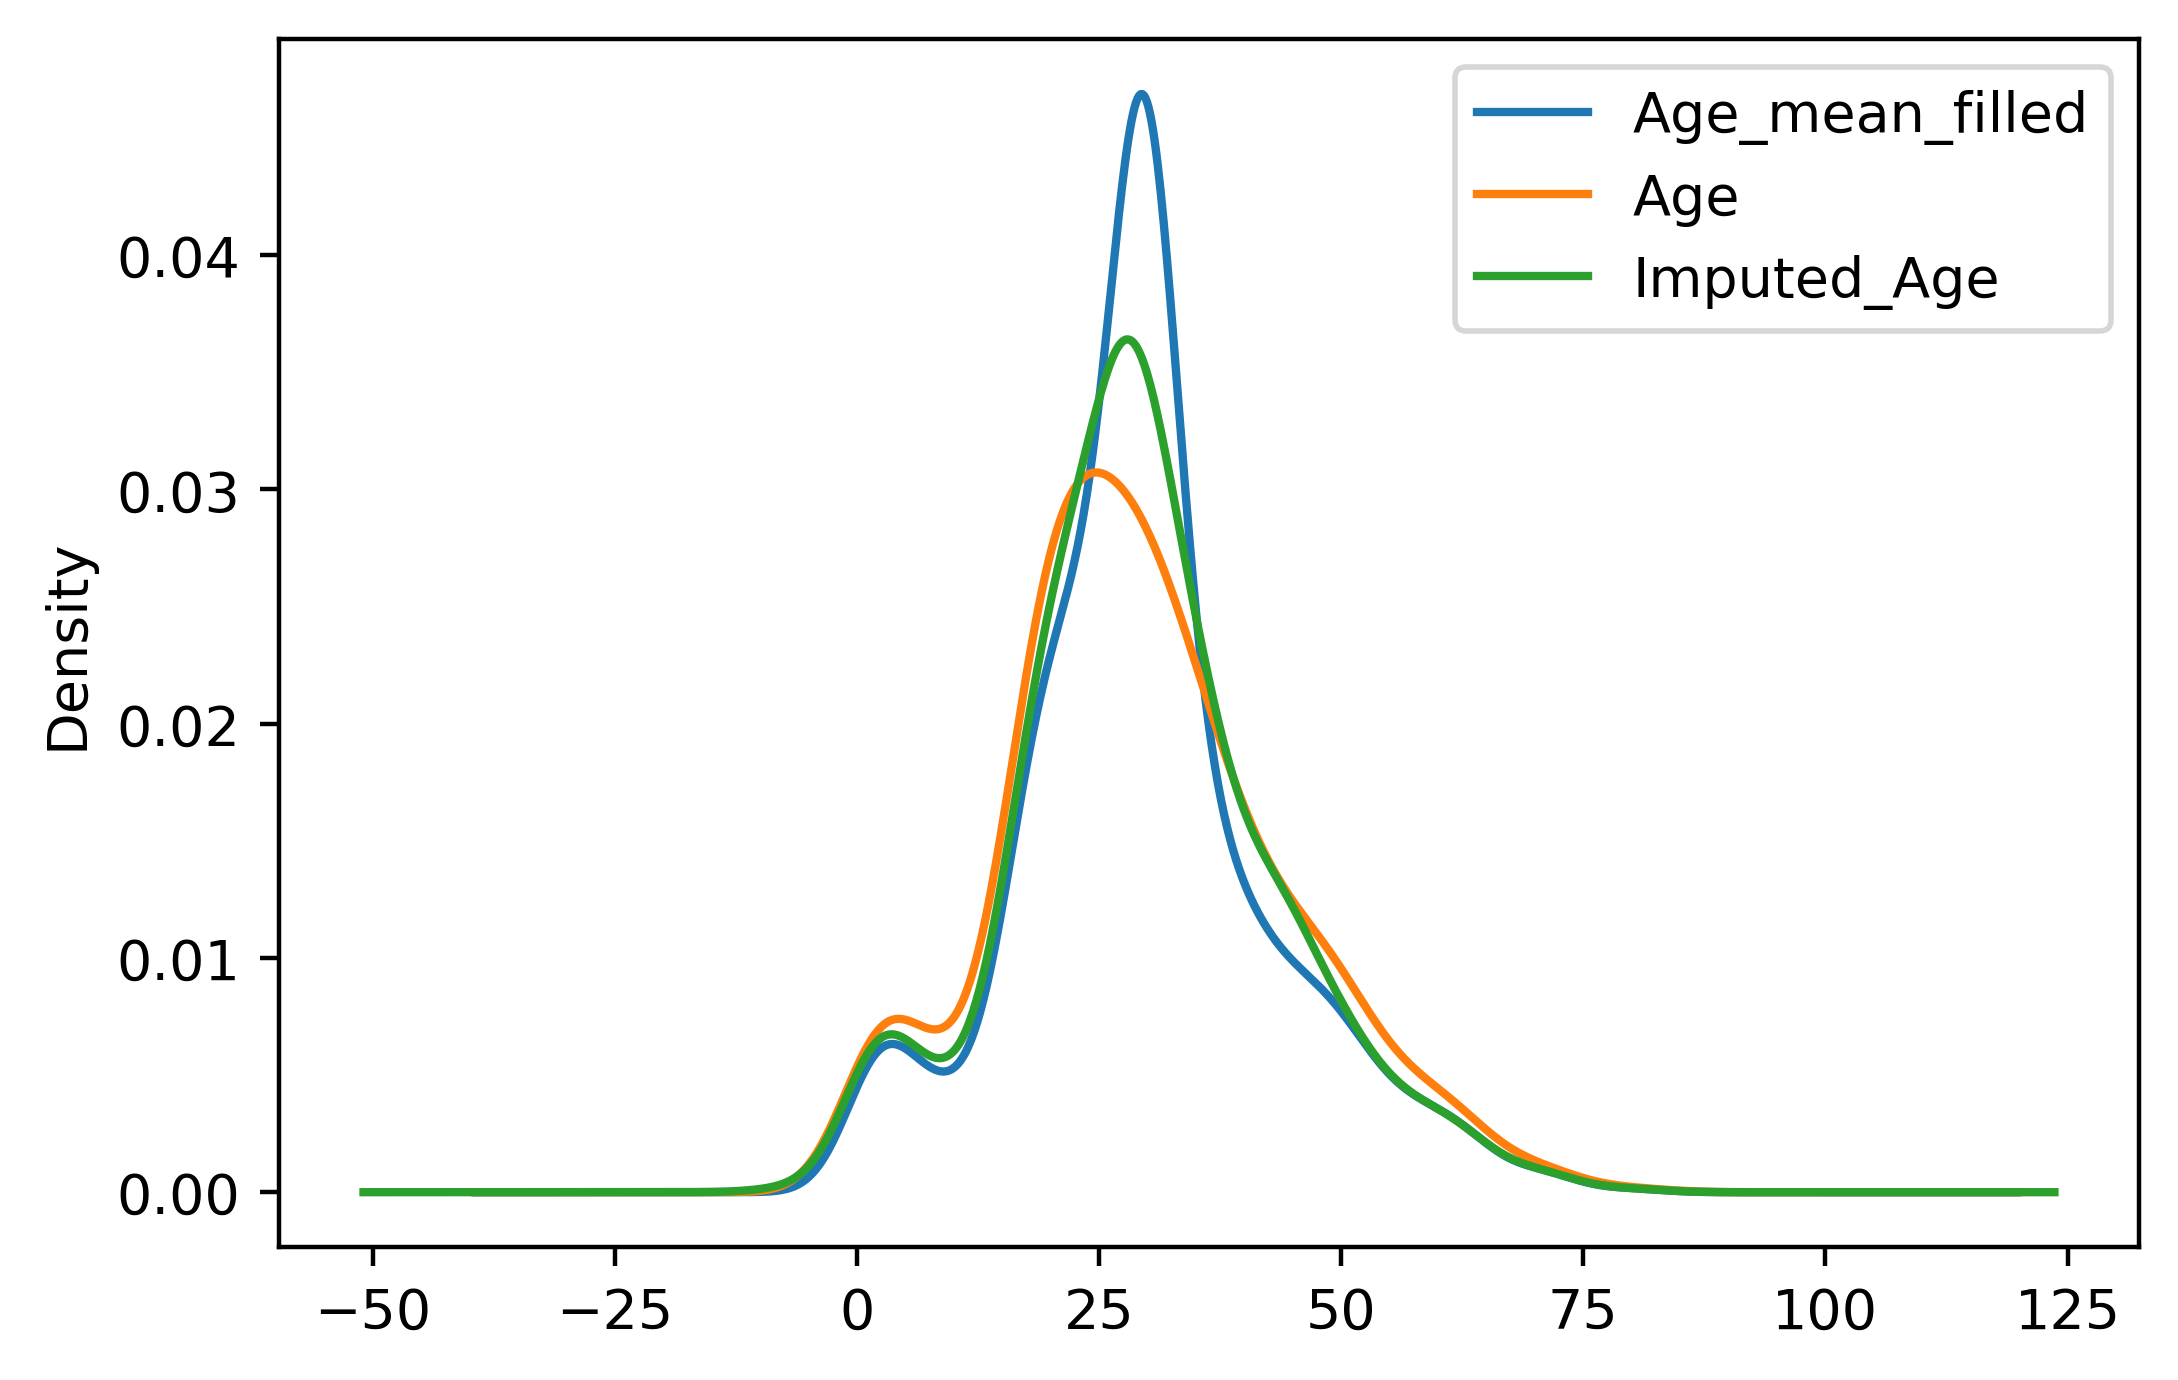

In [117]:
imputed_df[['Age_mean_filled',"Age", 'Imputed_Age']].plot.kde();

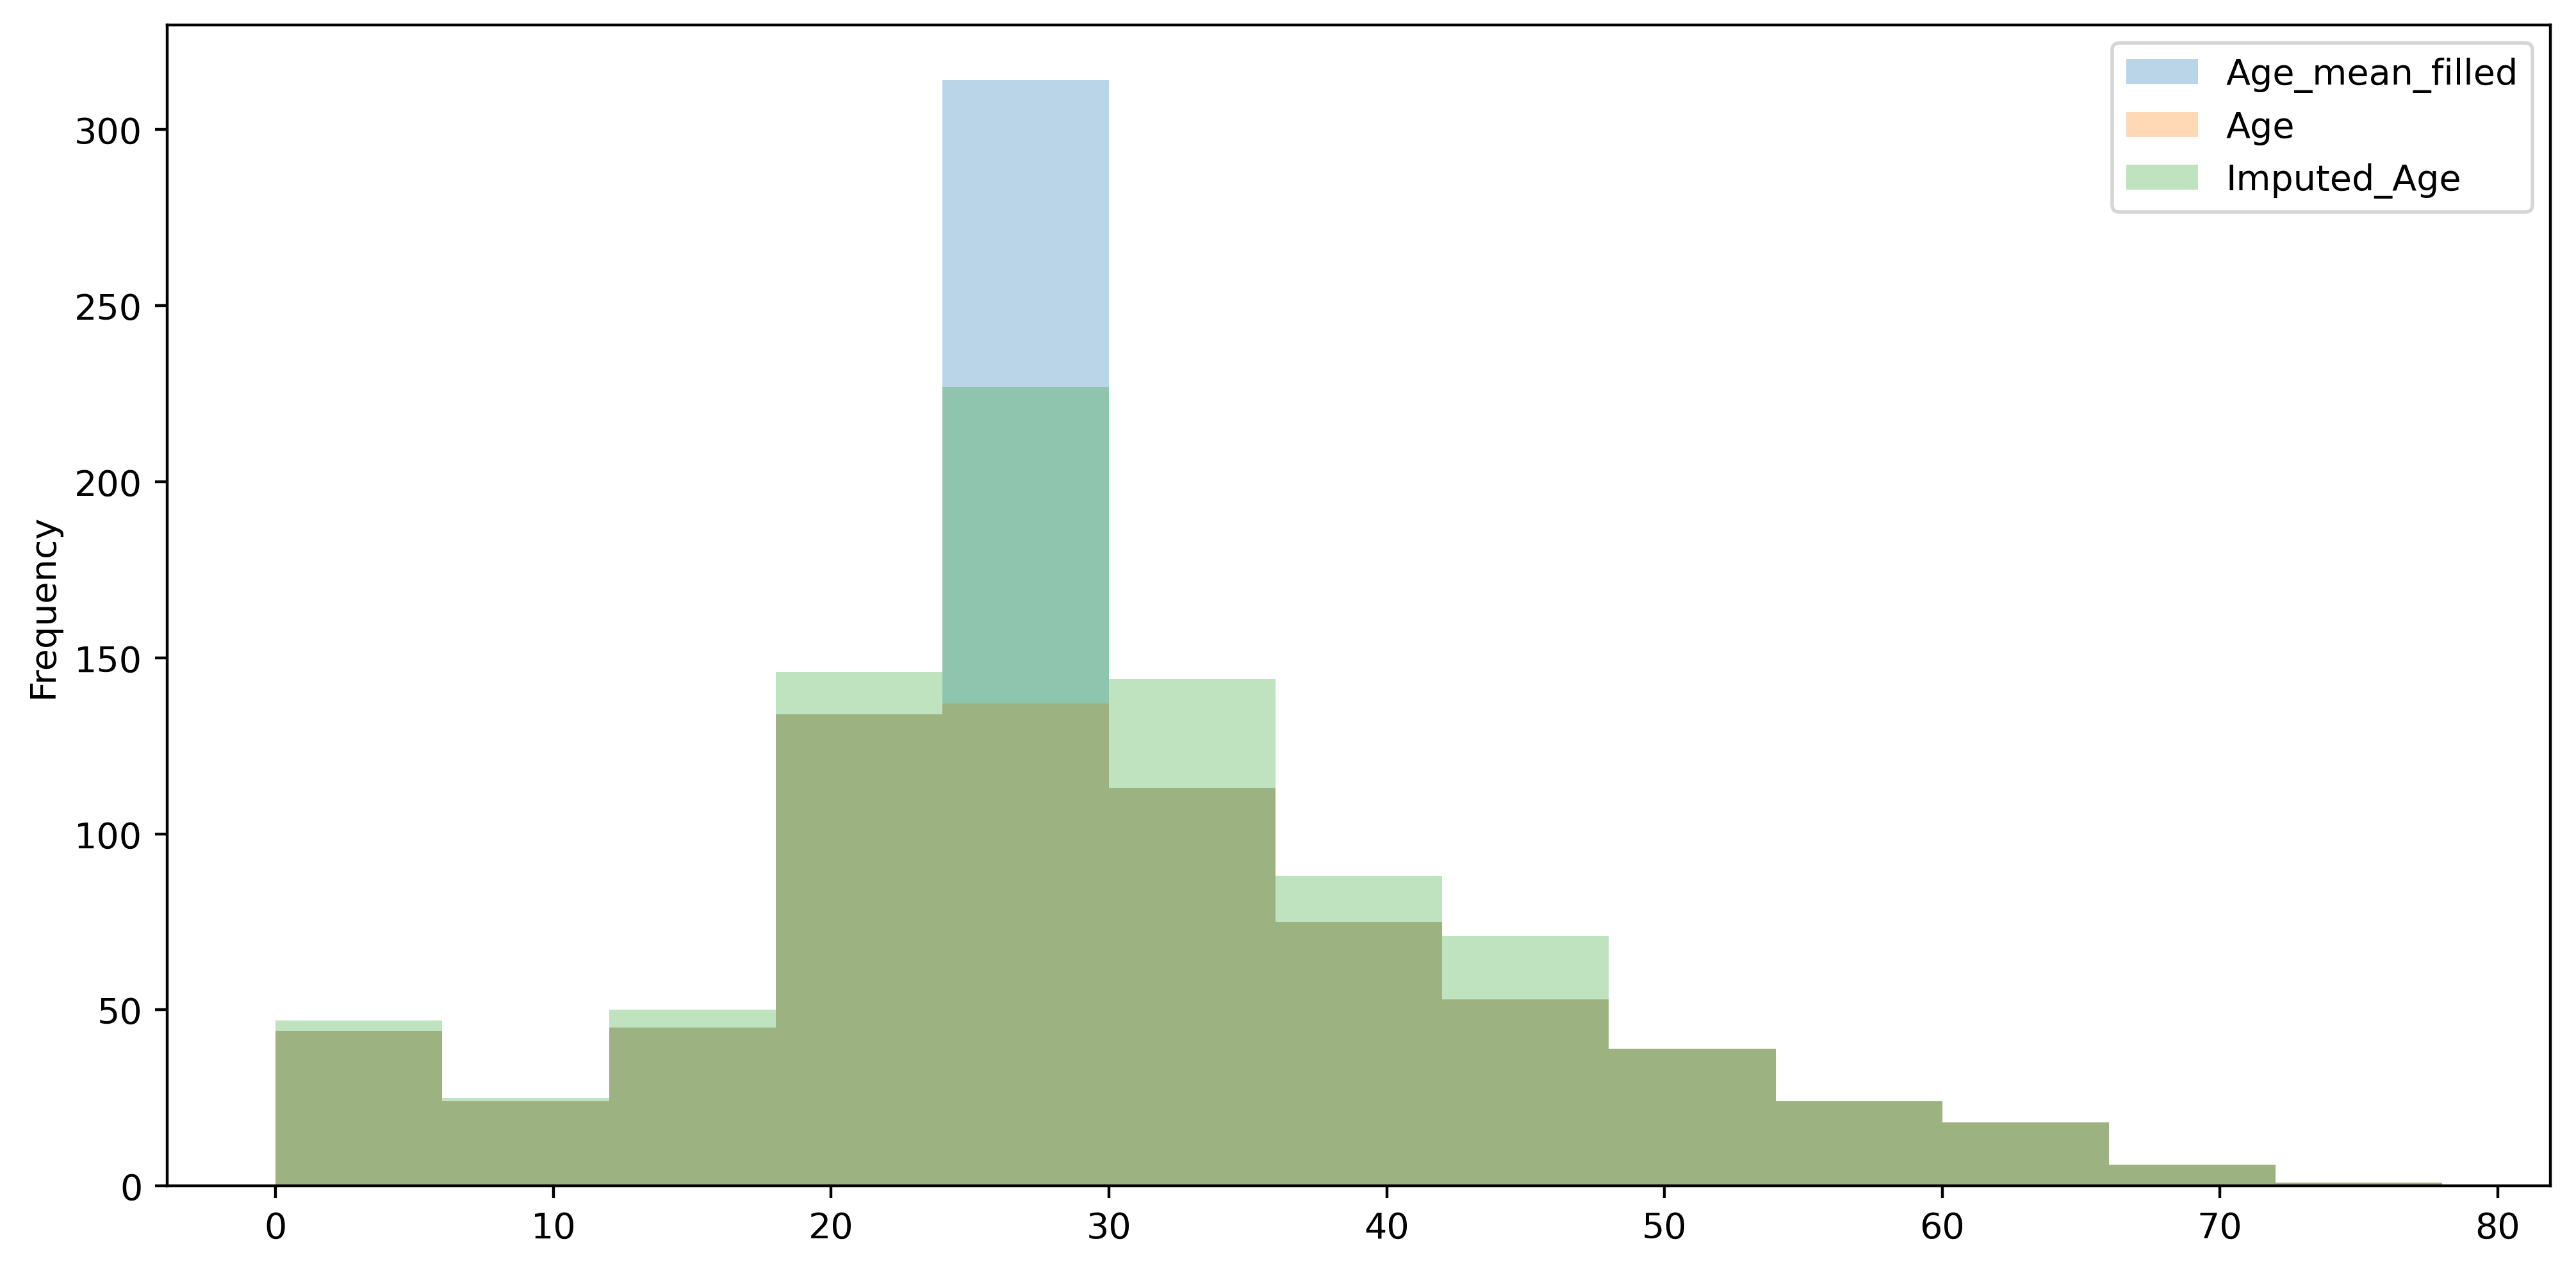

In [119]:
bins= np.arange(start=0, stop=80, step=6)
mean_imputation = imputed_df[['Age_mean_filled',"Age", 'Imputed_Age']]
mean_imputation.plot(kind='hist', bins=bins, figsize=[12,6], alpha=.3, legend=True);